In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Removing Hyphen from strings
for col in df.columns:
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Dataset characteristics
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
#Check for null and NaN values
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


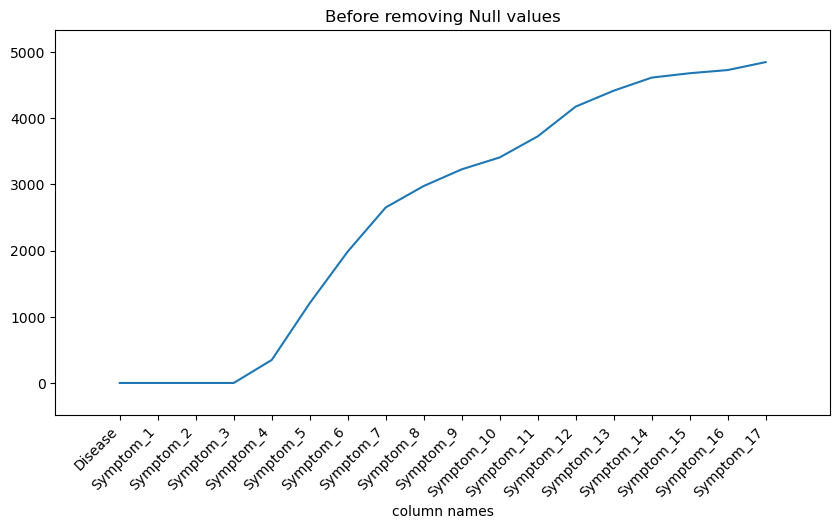

In [6]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [7]:
#Remove the trailing space from the symptom columns
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Fill the NaN values with zero
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [9]:
#Symptom severity rank
df1 = pd.read_csv('Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [10]:
#Get overall list of symptoms
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [11]:
#Encode symptoms in the data with the symptom rank
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0
4916,Peptic ulcer diseae,5,5,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0
4917,Dengue,3,3,3,5,4,7,3,5,4,4,3,6,2,3,0,0,0
4918,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#Assign symptoms with no rank to zero
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [13]:
#Check if entire columns have zero values so we can drop those values
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


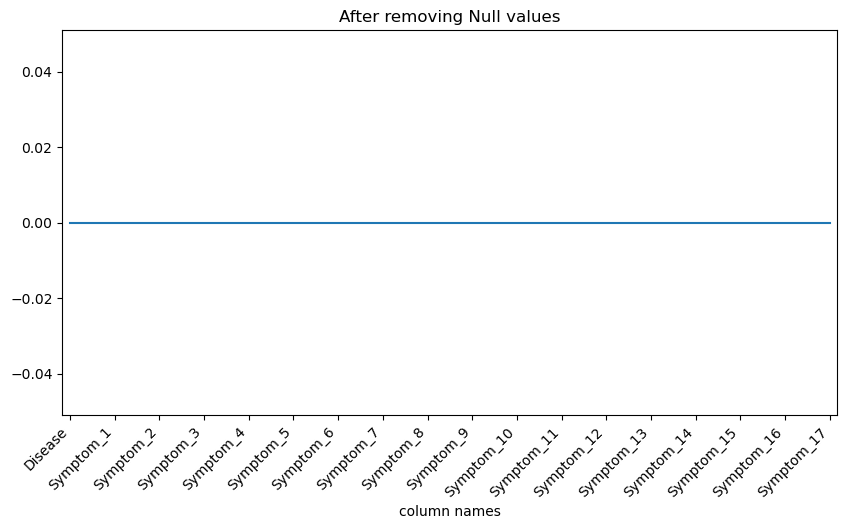

In [14]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [15]:
print("Number of symptoms used to identify the disease:",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified:",len(df['Disease'].unique()))

Number of symptoms used to identify the disease: 132
Number of diseases that can be identified: 41


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   int64 
 2   Symptom_2   4920 non-null   int64 
 3   Symptom_3   4920 non-null   int64 
 4   Symptom_4   4920 non-null   int64 
 5   Symptom_5   4920 non-null   int64 
 6   Symptom_6   4920 non-null   int64 
 7   Symptom_7   4920 non-null   int64 
 8   Symptom_8   4920 non-null   int64 
 9   Symptom_9   4920 non-null   int64 
 10  Symptom_10  4920 non-null   int64 
 11  Symptom_11  4920 non-null   int64 
 12  Symptom_12  4920 non-null   int64 
 13  Symptom_13  4920 non-null   int64 
 14  Symptom_14  4920 non-null   int64 
 15  Symptom_15  4920 non-null   int64 
 16  Symptom_16  4920 non-null   int64 
 17  Symptom_17  4920 non-null   int64 
dtypes: int64(17), object(1)
memory usage: 692.0+ KB


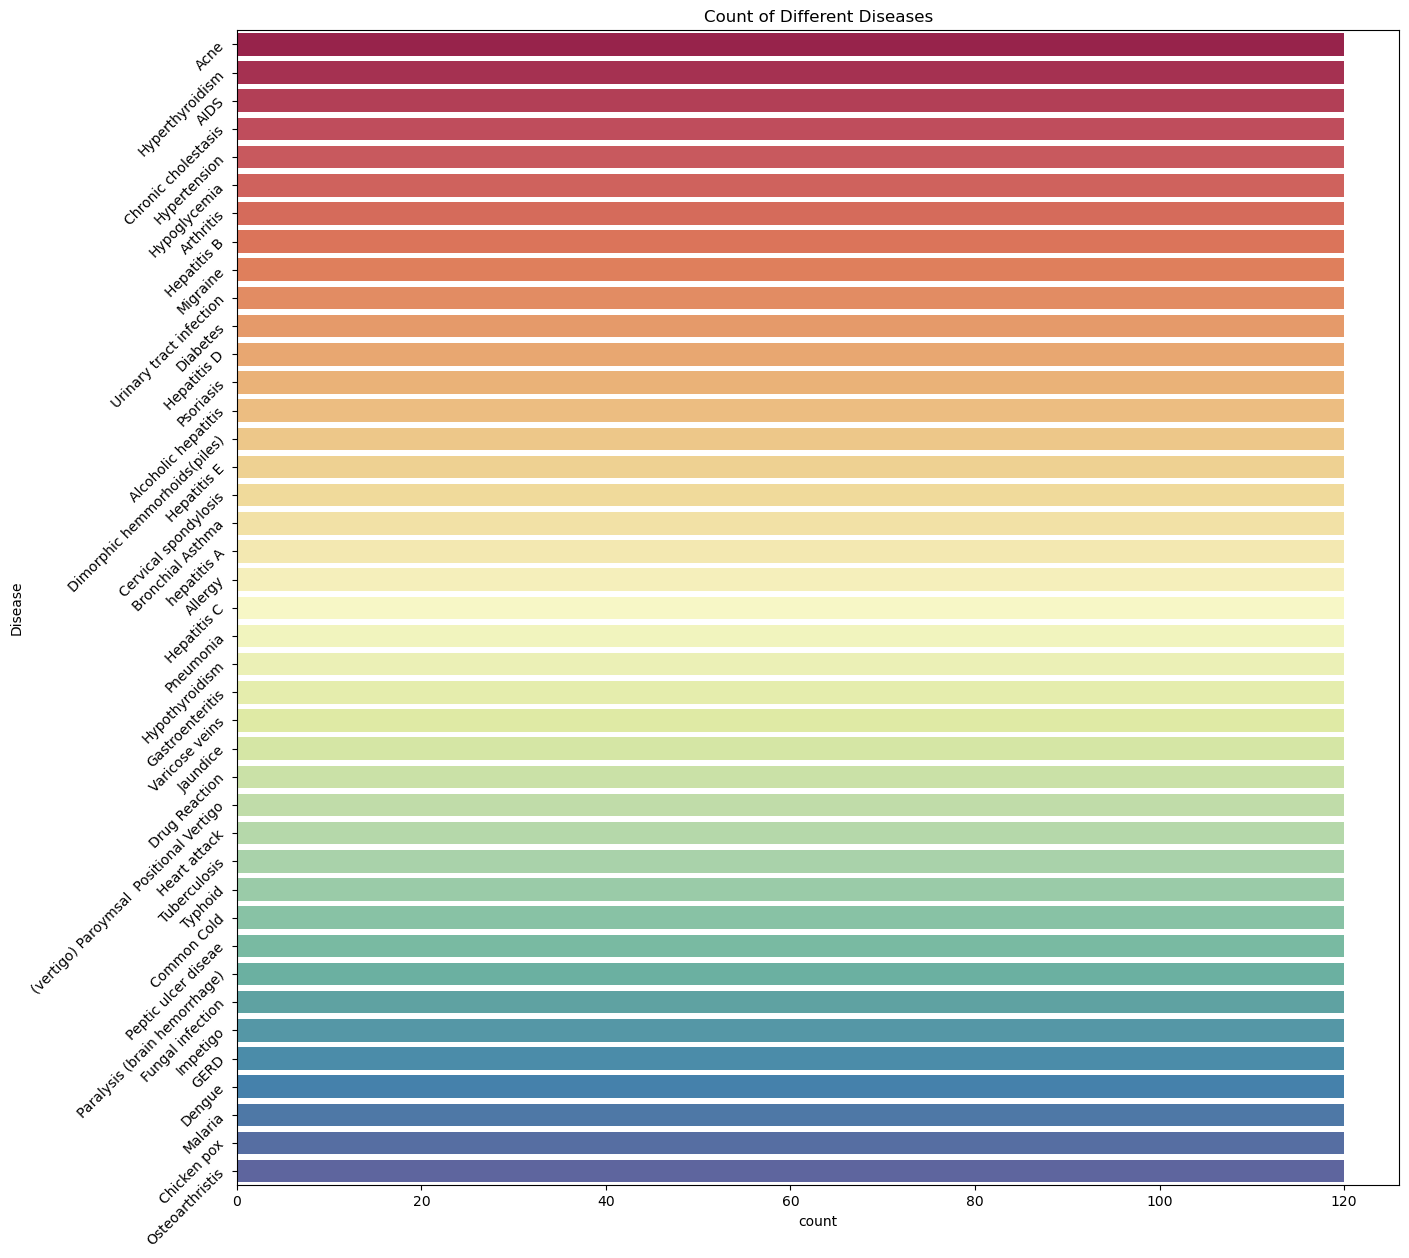

In [17]:
plt.figure(figsize=(15, 15))
sns.countplot(y="Disease", data=df, palette="Spectral")
plt.yticks(rotation=45)
plt.title("Count of Different Diseases")
plt.show()

In [18]:
#Get the names of diseases from data
df['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [19]:
#Separate the dataset
# A feature is an input; label is an output
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [20]:
#Splitting the dataset to training (80%) and testing (20%)
#Train Dataset: Used to fit the machine learning model.
#Test Dataset: Used to evaluate the fit machine learning model.
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3690, 17) (1230, 17) (3690,) (1230,)


In [21]:
#Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, data, labels):
    return accuracy_score(labels, estimator.predict(data))

#Initializing Models
models = {
    "KNN":KNeighborsClassifier(),
    "XGBoost":GradientBoostingClassifier(),
    "Random Forest":RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13),
    "DecisionTree":DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
}

#Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, x_test, y_test, cv = 10, n_jobs=-1, scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores:{scores*100.0}")
    print(f"Mean_score:{np.mean(scores)*100.0}")
    print(f"Standard_Divation Score:{np.std(scores)*100.0}")



KNN
Scores:[94.30894309 95.12195122 95.12195122 94.30894309 94.30894309 97.56097561
 94.30894309 92.68292683 95.12195122 95.12195122]
Mean_score:94.79674796747967
Standard_Divation Score:1.1612078745598107
XGBoost
Scores:[ 97.56097561  99.18699187  96.74796748  98.37398374  99.18699187
 100.          98.37398374  99.18699187 100.          99.18699187]
Mean_score:98.78048780487806
Standard_Divation Score:0.9789914291701037
Random Forest
Scores:[ 97.56097561 100.          97.56097561  98.37398374 100.
 100.         100.          99.18699187 100.          99.18699187]
Mean_score:99.1869918699187
Standard_Divation Score:0.9619641923739218
DecisionTree
Scores:[ 96.74796748  98.37398374  96.74796748  97.56097561  97.56097561
  98.37398374  96.74796748  98.37398374 100.          96.74796748]
Mean_score:97.72357723577235
Standard_Divation Score:1.0154468290078684


F1-score% = 96.71799835468565 | Accuracy% = 96.91056910569105


<Axes: >

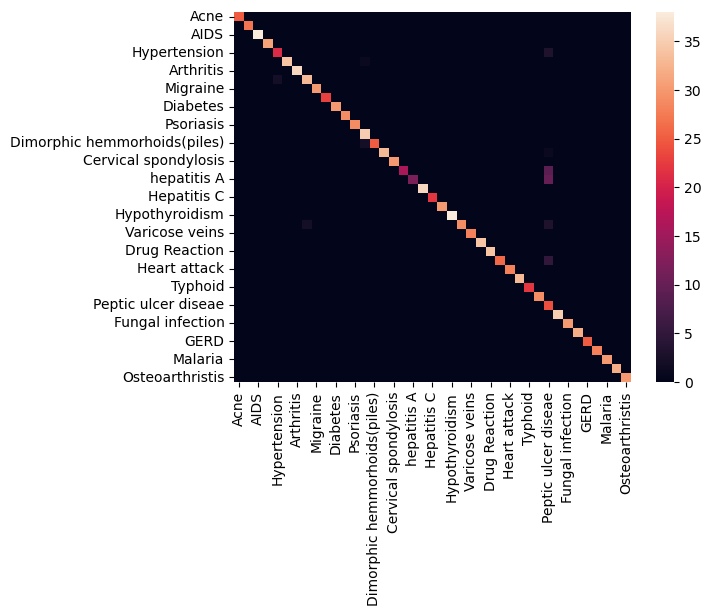

In [22]:
#Train a DecisionTreeClassifier Model
DT_model =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
DT_model.fit(x_train, y_train)
preds=DT_model.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

F1-score% = 99.65910837294926 | Accuracy% = 99.67479674796748


<Axes: >

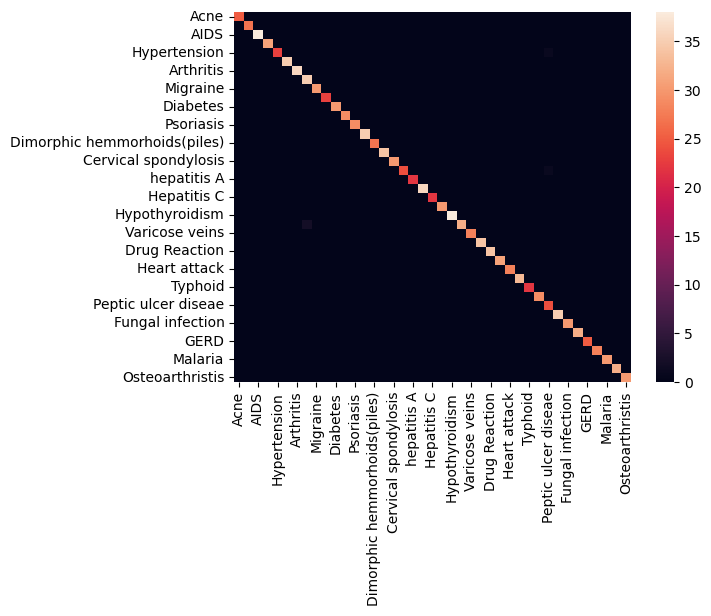

In [23]:
#Train RandomForestClassifier Model
rf_model = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rf_model.fit(x_train,y_train)
preds=rf_model.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

F1-score% = 99.65910837294929 | Accuracy% = 99.67479674796748


<Axes: >

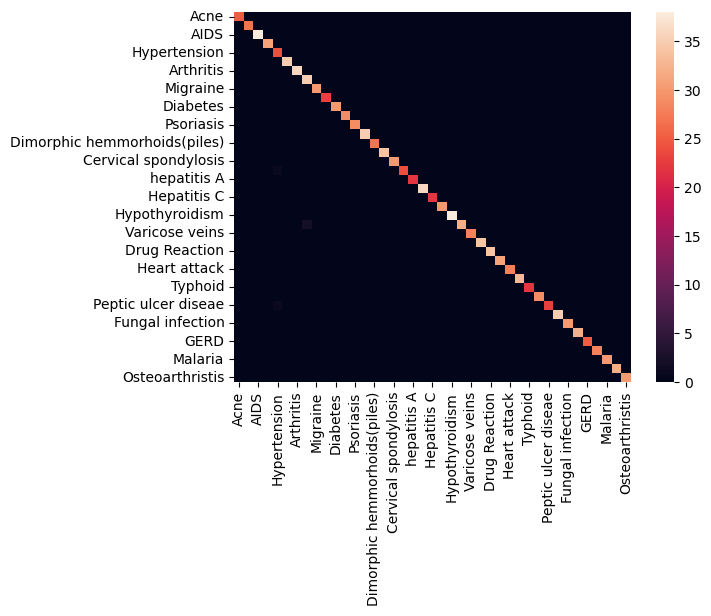

In [24]:
#Train KNeighborsClassifier Model
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
preds=KNN_model.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

F1-score% = 99.65910837294929 | Accuracy% = 99.67479674796748


<Axes: >

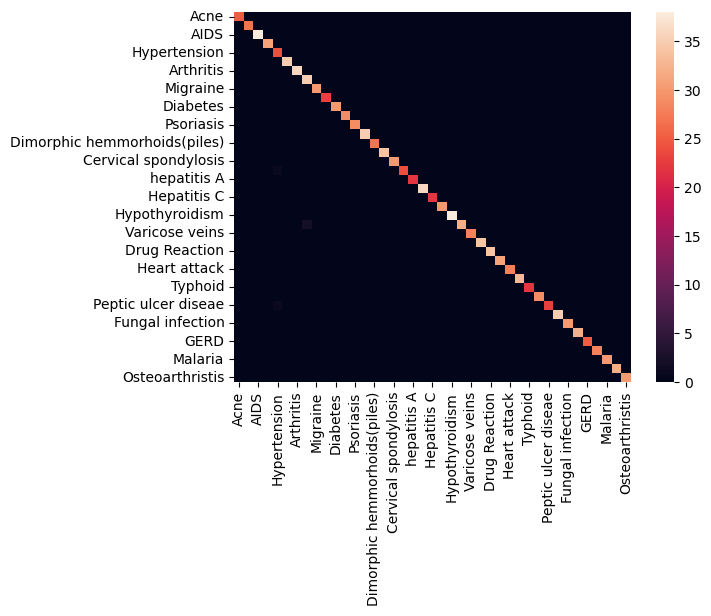

In [25]:
#Train XGBoost Model
XG_model = GradientBoostingClassifier()
XG_model.fit(x_train,y_train)
preds=XG_model.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

Fucntion to manually test the models

In [27]:
descrip_for_symptom = pd.read_csv("symptom_Description.csv")

In [28]:
descrip_for_symptom.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [29]:
precaution_to_avoid_symptom = pd.read_csv("symptom_precaution.csv")

In [30]:
precaution_to_avoid_symptom.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [31]:
#Save RandomForest Model
joblib.dump(rf_model, "random_forest.pkl")

['random_forest.pkl']

In [32]:
# Load the trained model
rf_model = joblib.load("random_forest.pkl")

# Load symptom severity data
df1 = pd.read_csv("Symptom-severity.csv")
df1['Symptom'] = df1['Symptom'].str.replace('_', ' ')

# Load disease description and precautions
descrip_for_symptom = pd.read_csv("symptom_Description.csv")
precaution_to_avoid_symptom = pd.read_csv("symptom_precaution.csv")

def prediction(model, *symptoms):
    """
    Predict the disease based on user-provided symptoms.
    """
    # Create a list of symptoms
    Symptoms = list(symptoms)
    
    # Map symptoms to their corresponding weights
    X = np.array(df1["Symptom"])
    Y = np.array(df1["weight"])
    
    for j in range(len(Symptoms)):
        if Symptoms[j] != 0:  # Skip if symptom is 0 (no symptom)
            for k in range(len(X)):
                if Symptoms[j].lower() == X[k].lower():  # Case-insensitive comparison
                    Symptoms[j] = Y[k]
                    break
            else:
                # If symptom is not found in the dataset, set its weight to 0
                Symptoms[j] = 0
    
    # Prepare the input for prediction
    predict_Symp = [Symptoms]
    
    # Predict the disease
    pred = model.predict(predict_Symp)
    
    # Get disease description
    describe = descrip_for_symptom[descrip_for_symptom['Disease'] == pred[0]].values[0][1]
    
    # Get disease precautions
    recommendations = precaution_to_avoid_symptom[precaution_to_avoid_symptom['Disease'] == pred[0]]
    c = np.where(precaution_to_avoid_symptom['Disease'] == pred[0])[0][0]
    precuation_list = []
    for i in range(1, len(precaution_to_avoid_symptom.iloc[c])):
        precuation_list.append(precaution_to_avoid_symptom.iloc[c, i])
    
    # Display the results
    print("The Disease Name: ", pred[0], "\n")
    print("The Disease Description:", describe, "\n")
    print("Recommended Things to do at home: ")
    for i in precuation_list:
        print(i)

# Example usage
prediction(rf_model, "itching", "skin rash", "nodal skin eruptions", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
print("=="*30)
prediction(rf_model, "vomiting", "joint pain", "yellowish skin", "nausea", "dark urine", "loss of appetite", "abdominal pain", "diarrhoea", "mild fever", "yellowing of eyes", "muscle pain", 0, 0, 0, 0, 0, 0)
print("=="*30)
prediction(rf_model, "vomiting", "breathlessness", "sweating", "chest pain", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

The Disease Name:  Fungal infection 

The Disease Description: In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi. 

Recommended Things to do at home: 
bath twice
use detol or neem in bathing water
keep infected area dry
use clean cloths
The Disease Name:  hepatitis A 

The Disease Description: Hepatitis A is a highly contagious liver infection caused by the hepatitis A virus. The virus is one of several types of hepatitis viruses that cause inflammation and affect your liver's ability to function. 

Recommended Things to do at home: 
Consult nearest hospital
wash hands through
avoid fatty spicy food
medication
The Disease Name:  Heart attack 

The Disease Description: The death of heart muscle due to the loss of blood supp